##Importing the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
import pandas as pd
url='https://drive.google.com/file/d/1oSSlDKz2q0kMYjLcUmC-yjaF0hxyOPo5/view?usp=share_link'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
dataset = pd.read_csv(url, skiprows=52)

In [3]:
dataset.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10811496,K00753.01,NaN,CANDIDATE,CANDIDATE,0.000,0,0,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


##Data Preprocessing


Koi_time0bk and koi_time0bk_err1 and 2 aren't useful because theyre the time of the first detected transit minus some offset. The non numeric columns aren't useful either.

Also koi_teq_err1 and 2 are all null columns, so we'll drop them.

koi_score is not needed. It is the probability values for the categorization.

Hence we'll remove all the non-numeric columns and then these unrequired columns.


In [4]:
num_data = dataset.copy()

# removing string type columns from dataframe
num_data = pd.concat([num_data['koi_disposition'], num_data['koi_pdisposition'], num_data.select_dtypes(exclude=['object']).copy()], axis=1)

# removing columns that arent needed
num_data.drop(['kepid', 'koi_pdisposition', 'koi_score', 'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_teq_err1', 'koi_teq_err2'], axis = 1, inplace = True)

###Taking care of missing values


In [5]:
num_data.isnull().sum() #identifying and displaying missing data

koi_disposition        0
koi_fpflag_nt          0
koi_fpflag_ss          0
koi_fpflag_co          0
koi_fpflag_ec          0
koi_period             0
koi_period_err1      454
koi_period_err2      454
koi_impact           363
koi_impact_err1      454
koi_impact_err2      454
koi_duration           0
koi_duration_err1    454
koi_duration_err2    454
koi_depth            363
koi_depth_err1       454
koi_depth_err2       454
koi_prad             363
koi_prad_err1        363
koi_prad_err2        363
koi_teq              363
koi_insol            321
koi_insol_err1       321
koi_insol_err2       321
koi_model_snr        363
koi_tce_plnt_num     346
koi_steff            363
koi_steff_err1       468
koi_steff_err2       483
koi_slogg            363
koi_slogg_err1       468
koi_slogg_err2       468
koi_srad             363
koi_srad_err1        468
koi_srad_err2        468
ra                     0
dec                    0
koi_kepmag             1
dtype: int64

In [6]:
# discarding the rows containing null values
num_data = num_data[num_data.isnull().sum(axis=1) == 0]

In [7]:
num_data.describe()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_impact,koi_impact_err1,koi_impact_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
count,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8.744000e+03,8.744000e+03,8744.000000,8744.000000,8744.000000,...,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000,8744.000000
mean,0.183211,0.242681,0.203454,0.125000,56.080618,1.839523e-03,-1.839523e-03,0.718315,1.972656,-0.330185,...,-161.354758,4.310223,0.120733,-0.140411,1.704566,0.352884,-0.379933,292.075061,43.828259,14.273969
std,4.982739,0.428728,0.402590,0.330738,117.385280,7.276504e-03,7.276504e-03,3.176618,9.464462,1.227048,...,72.986448,0.431557,0.132813,0.082936,5.682429,0.906364,1.810943,4.772918,3.599786,1.343509
min,0.000000,0.000000,0.000000,0.000000,0.259820,1.100000e-08,-1.568000e-01,0.000000,0.000000,-59.320000,...,-1762.000000,0.047000,0.000000,-1.207000,0.109000,0.000000,-103.825000,279.852720,36.577381,6.966000
25%,0.000000,0.000000,0.000000,0.000000,2.667824,5.286750e-06,-2.456250e-04,0.197000,0.040000,-0.447000,...,-197.000000,4.215750,0.043000,-0.195000,0.826000,0.125750,-0.247000,288.670237,40.805911,13.474000
50%,0.000000,0.000000,0.000000,0.000000,8.970985,3.323000e-05,-3.323000e-05,0.540500,0.192000,-0.207000,...,-159.000000,4.439000,0.070000,-0.127000,0.997000,0.246000,-0.111000,292.285005,43.703989,14.534000
75%,0.000000,0.000000,0.000000,0.000000,34.190033,2.456250e-04,-5.286750e-06,0.889000,0.378850,-0.045000,...,-112.000000,4.544000,0.149000,-0.087000,1.346250,0.356000,-0.069000,295.900510,46.722135,15.318250
max,465.000000,1.000000,1.000000,1.000000,1071.232624,1.568000e-01,-1.100000e-08,100.806000,85.540000,0.000000,...,0.000000,5.364000,1.472000,0.000000,180.013000,33.091000,0.000000,301.720760,52.336010,19.065000


koi_fpflag_nt is a flag value hence cannot have a value of 465, so we'll drop the rows having that value


In [8]:
num_data.drop(num_data[num_data.koi_fpflag_nt == num_data.koi_fpflag_nt.max()].index, inplace=True)

candidate = 0
confirmed = 1
false positive = 2 in k_disposition


candidate = 0
false positive = 1 in k_pdisposition

Removing columns which have a high correlation coefficient with some others

In [9]:
def remove_high_corr(df, threshold):
    trimask = df.corr().abs().mask(~np.triu(np.ones(df.corr().shape, dtype=bool), k=1))
    blocklist = [col for col in trimask.columns if (trimask[col] > threshold).any()]
    df.drop(columns=blocklist, axis=1,inplace=True)
remove_high_corr(num_data, 0.80)

<ipython-input-9-623b32b04538>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  trimask = df.corr().abs().mask(~np.triu(np.ones(df.corr().shape, dtype=bool), k=1))


<ipython-input-10-f64e7d0f897b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(num_data.corr(), cmap="Blues")


<Axes: >

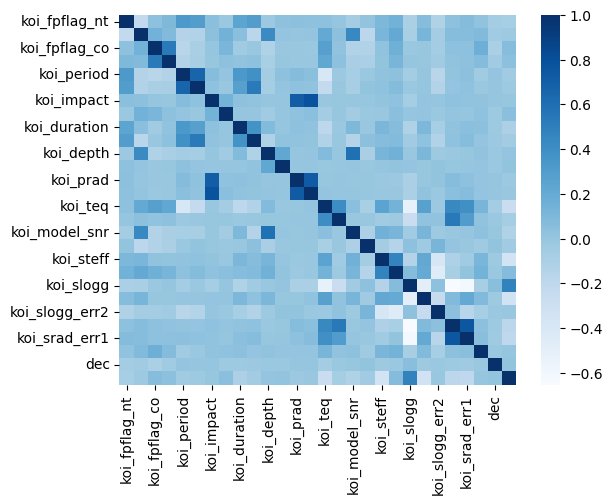

In [10]:
sns.heatmap(num_data.corr(), cmap="Blues")

###Splitting into training and test data

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
X = num_data.iloc[:, 1:].values
y = LabelEncoder().fit_transform(num_data.iloc[:, 0].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, shuffle = True) # 80/20

###Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,4:] = sc.fit_transform(X_train[:,4:])
X_test[:,4:]=sc.transform(X_test[:,4:])
# first 4 columns needn't be standardized

##Training and Testing the Model

###XGBoost


In [13]:
import xgboost as xgb
classifier_XGB = xgb.XGBClassifier(learning_rate = 0.1, min_child_weight = 1, gamma = 0, max_depth = 5, n_estimators = 1000, scale_pos_weight = 1, subsample = 0.8, colsample_bytree = 0.8, nthread = 4)
classifier_XGB.fit(X_train, y_train)
# predicting test data
y_pred_XGB = classifier_XGB.predict(X_test)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [18:05:01] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


<Axes: >

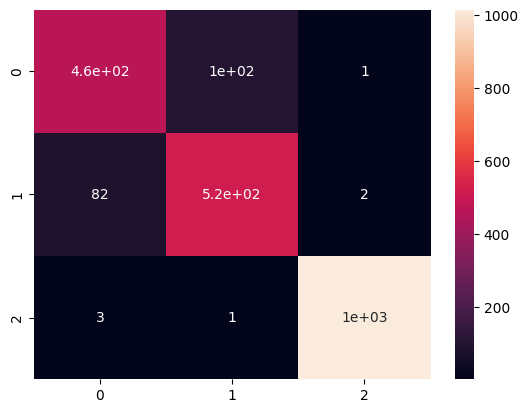

In [14]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm_XGB = confusion_matrix(y_test, y_pred_XGB)
sns.heatmap(cm_XGB, annot = True)

In [15]:
# Accuracy scores
print(f"Training set score: {classifier_XGB.score(X_train, y_train)*100:.2f}")
print(f"Test set score: {classifier_XGB.score(X_test, y_test)*100:.2f}")

Training set score: 100.00
Test set score: 91.35


###Kernel SVM

In [16]:
from sklearn.svm import SVC
classifier_SVC = SVC(kernel = 'rbf')
classifier_SVC.fit(X_train, y_train)
# predicting test data
y_pred_SVC = classifier_SVC.predict(X_test)

<Axes: >

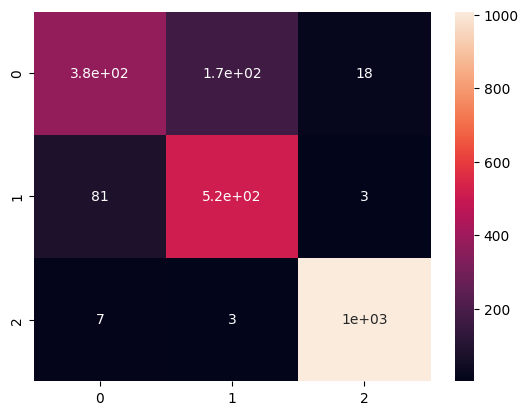

In [17]:
# Confusion matrix
cm_SVC = confusion_matrix(y_test, y_pred_SVC)
sns.heatmap(cm_SVC, annot = True)

In [18]:
# Accuracy scores
print(f"Training set score: {classifier_SVC.score(X_train, y_train)*100:.2f}")
print(f"Test set score: {classifier_SVC.score(X_test, y_test)*100:.2f}")

Training set score: 89.60
Test set score: 87.01


###Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression()
classifier_LR.fit(X_train, y_train)
# predicting test data
y_pred_LR = classifier_LR.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

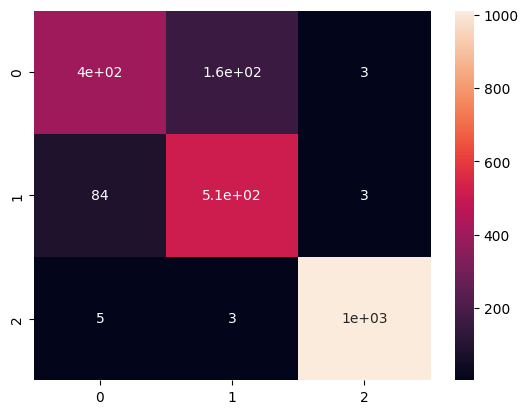

In [20]:
# Confusion matrix
cm_LR = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm_LR, annot = True)

In [21]:
# Accuracy scores
print(f"Training set score: {classifier_LR.score(X_train, y_train)*100:.2f}")
print(f"Test set score: {classifier_LR.score(X_test, y_test)*100:.2f}")

Training set score: 89.74
Test set score: 88.24


###Naive Bayes

In [22]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)
# predicting test data
y_pred_NB = classifier_NB.predict(X_test)

<Axes: >

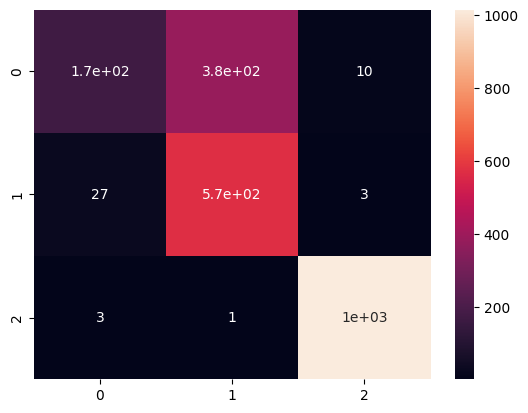

In [23]:
# Confusion matrix
cm_NB = confusion_matrix(y_test, y_pred_NB)
sns.heatmap(cm_NB, annot = True)

In [24]:
# Accuracy scores
print(f"Training set score: {classifier_NB.score(X_train, y_train)*100:.2f}")
print(f"Test set score: {classifier_NB.score(X_test, y_test)*100:.2f}")

Training set score: 80.98
Test set score: 80.38


###Random Forest Classifier

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier_RFC = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
classifier_RFC.fit(X_train, y_train)
# predicting test data
y_pred_RFC = classifier_RFC.predict(X_test)

<Axes: >

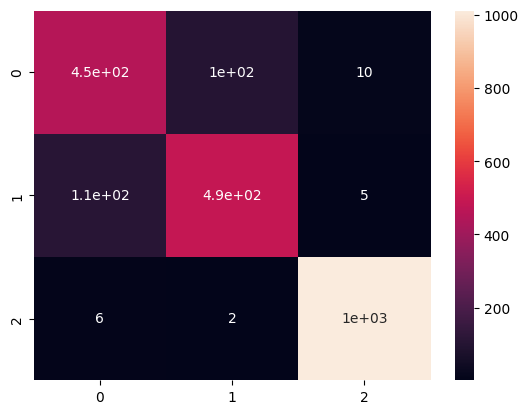

In [26]:
# Confusion matrix
cm_RFC = confusion_matrix(y_test, y_pred_RFC)
sns.heatmap(cm_RFC, annot = True)

In [27]:
# Accuracy scores
print(f"Training set score: {classifier_RFC.score(X_train, y_train)*100:.2f}")
print(f"Test set score: {classifier_RFC.score(X_test, y_test)*100:.2f}")

Training set score: 99.41
Test set score: 89.30


###Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier_DTC = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_DTC.fit(X_train, y_train)
# predicting test data
y_pred_DTC = classifier_DTC.predict(X_test)

<Axes: >

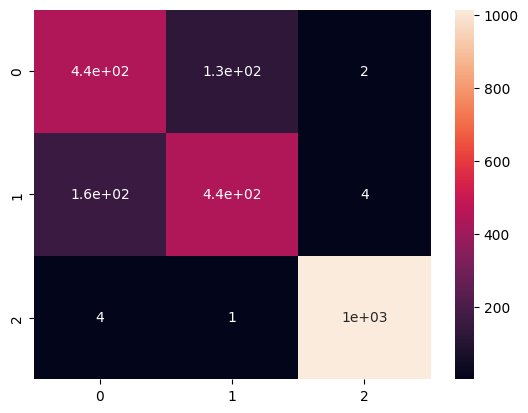

In [29]:
# Confusion matrix
cm_DTC = confusion_matrix(y_test, y_pred_DTC)
sns.heatmap(cm_DTC, annot = True)

In [30]:
# Accuracy scores
print(f"Training set score: {classifier_DTC.score(X_train, y_train)*100:.2f}")
print(f"Test set score: {classifier_DTC.score(X_test, y_test)*100:.2f}")

Training set score: 100.00
Test set score: 86.46


###K Neighbors Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KN = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_KN.fit(X_train, y_train)
# predicting test data
y_pred_KN = classifier_KN.predict(X_test)

<Axes: >

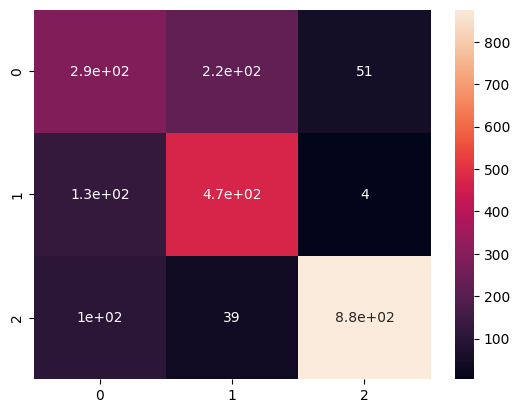

In [32]:
# Confusion matrix
cm_KN = confusion_matrix(y_test, y_pred_KN)
sns.heatmap(cm_KN, annot = True)

In [33]:
# Accuracy scores
print(f"Training set score: {classifier_KN.score(X_train, y_train)*100:.2f}")
print(f"Test set score: {classifier_KN.score(X_test, y_test)*100:.2f}")

Training set score: 83.64
Test set score: 74.89


###Support Vector Machine

In [34]:
from sklearn.svm import SVC
classifier_SVM = SVC(kernel = 'linear', random_state = 0)
classifier_SVM.fit(X_train, y_train)
# predicting test data
y_pred_SVM = classifier_SVM.predict(X_test)

<Axes: >

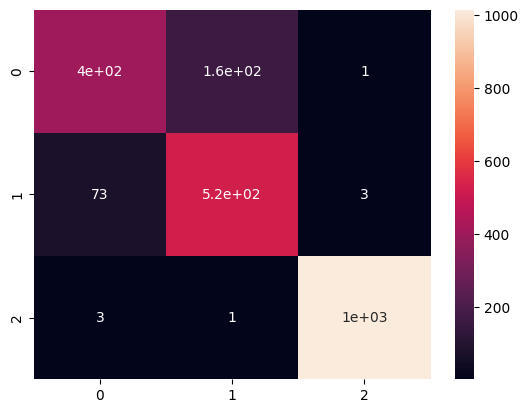

In [35]:
# Confusion matrix
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
sns.heatmap(cm_SVM, annot = True)

In [36]:
# Accuracy scores
print(f"Training set score: {classifier_SVM.score(X_train, y_train)*100:.2f}")
print(f"Test set score: {classifier_SVM.score(X_test, y_test)*100:.2f}")

Training set score: 89.89
Test set score: 88.93


XGBoost has the highest accuracy i.e. 91.35%